Kaggle: https://www.kaggle.com/jiuzhang/lending-club-subset

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
TRAIN_DIR = './input/loan_sub.csv'

# Explantory Data Analyisis - Take a Glance at the Data

In [3]:
train = pd.read_csv(TRAIN_DIR, sep=',', header=0)

In [4]:
train.shape

(122607, 68)

In [5]:
train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,0.4,1.0,1.0,1.0,0,8.14350,20141201T000000,1,1,1
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,0.8,1.0,1.0,1.0,1,2.39320,20161201T000000,1,1,1
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,1.0,1.0,1.0,1.0,0,8.25955,20141201T000000,1,1,1
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,0.2,1.0,1.0,1.0,0,8.27585,20141201T000000,0,1,1
4,1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,...,0.8,1.0,1.0,1.0,0,5.21533,20141201T000000,1,1,1


In [6]:
train.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'is_inc_v', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'not_compliant', 'status', 'inactive_loans', 'bad_loans',
       'emp_length_num', 'grade_num', 'sub_gra

In [7]:
train.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,grade_num,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,last_delinq_none,last_record_none,last_major_derog_none
count,1.226070e+05,1.226070e+05,122607.000000,122607.000000,122607.000000,122607.000000,122607.000000,1.226030e+05,122607.000000,122578.000000,...,122607.000000,122607.000000,122578.000000,122578.000000,122462.000000,122607.000000,122603.000000,122607.000000,122607.000000,122607.000000
mean,4.728452e+06,5.493222e+06,12809.733743,12736.123753,12497.828395,13.639487,396.623285,7.138502e+04,15.496888,0.211996,...,4.232882,0.597509,0.858107,0.908173,0.996734,0.123672,7.564725,0.588115,0.897795,0.873906
std,5.938517e+06,6.604693e+06,7932.313398,7887.167118,7946.731527,4.390836,239.475936,5.841483e+04,7.497442,0.662052,...,1.362138,0.278934,0.348942,0.288783,0.057059,0.329208,4.127291,0.492177,0.302918,0.331957
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,...,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.028895,0.000000,0.000000,0.000000
25%,8.532925e+05,1.064872e+06,6700.000000,6625.000000,6271.000000,10.620000,215.985000,4.405250e+04,9.880000,0.000000,...,3.000000,0.400000,1.000000,1.000000,1.000000,0.000000,4.362575,0.000000,1.000000,1.000000
50%,1.621401e+06,1.879659e+06,11000.000000,10950.000000,10500.000000,13.480000,348.180000,6.000000e+04,15.260000,0.000000,...,4.000000,0.600000,1.000000,1.000000,1.000000,0.000000,6.965760,1.000000,1.000000,1.000000
75%,6.699942e+06,8.117948e+06,17600.000000,17425.000000,17000.000000,16.290000,521.930000,8.500000e+04,20.850000,0.000000,...,5.000000,0.800000,1.000000,1.000000,1.000000,0.000000,10.215850,1.000000,1.000000,1.000000
max,3.784128e+07,4.060424e+07,35000.000000,35000.000000,35000.000000,26.060000,1408.130000,7.141778e+06,39.880000,29.000000,...,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,54.171000,1.000000,1.000000,1.000000


# Explantory Data Analyisis - Look at the Label

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Translate the label column 'bad_loans' (1 is bad, 0 is not bad) into 'safe_loans' (1 is good, -1 is bad).

In [9]:
train['safe_loans'] = train['bad_loans'].apply(lambda x: -1 if x == 1 else 1)

In [10]:
train['safe_loans'].value_counts(normalize=True)

 1    0.811185
-1    0.188815
Name: safe_loans, dtype: float64

Observation: It's a imbalanced dataset, with much fewer bad loans.

# Explantory Data Analyisis - Look at the Features

For simplicity, we only look at several features: 'grade', 'term','home_ownership', 'emp_length'.

<AxesSubplot:xlabel='grade', ylabel='count'>

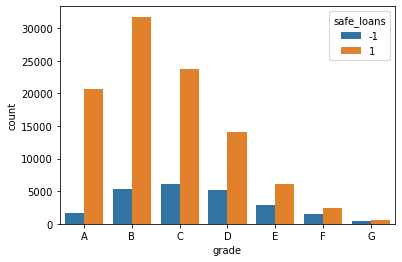

In [11]:
sns.countplot(data=train, x='grade', hue='safe_loans',
              order=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

Observation: Column "grade" is useful. Lower grade loans are easy to default.

<AxesSubplot:xlabel='term', ylabel='count'>

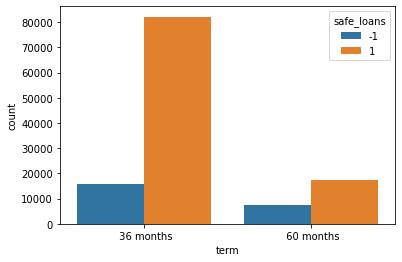

In [12]:
sns.countplot(data=train, x='term', hue='safe_loans')

Observation: Column "term" is useful. Longer term loans are easy to default.

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

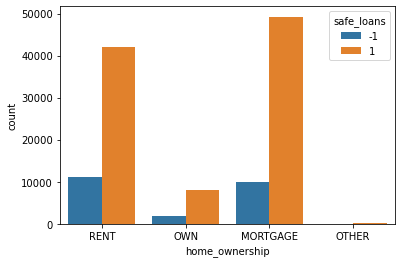

In [13]:
sns.countplot(data=train, x='home_ownership', hue='safe_loans')

Observation: Column "home_ownership" is useful. Owned home loans are not easy to default.

<AxesSubplot:xlabel='emp_length', ylabel='count'>

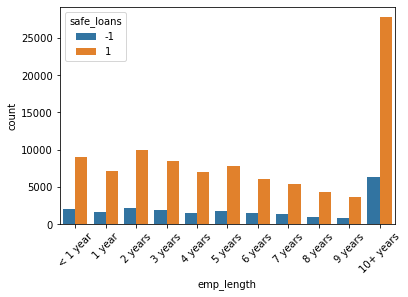

In [14]:
plt.xticks(rotation=45)
sns.countplot(data=train, x='emp_length', hue='safe_loans',
              order=['< 1 year', '1 year', '2 years', '3 years', '4 years',
                     '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'])

Observation: Column "emp-length" might be useful.

# Prepare Data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
def down_sampling(data, label_col):
    labels = data[label_col].unique()
    assert len(labels) == 2
    
    label1_data = data[data[label_col] == labels[0]]
    label2_data = data[data[label_col] == labels[1]]
    if len(label1_data) < len(label2_data):
        label[0], label[1] = label[1], label[0]
        label1_data, label2_data = label2_data, label1_data
        
    sample_percentage = len(label2_data) / len(label1_data)
    label1_data = label1_data.sample(frac=sample_percentage)
    return pd.concat([label1_data, label2_data], axis=0).reset_index(drop=True)

In [17]:
def get_dummies(data, col):
    data = pd.concat([data, pd.get_dummies(data[col], prefix=col)], axis=1)
    return data.drop([col], axis=1)

In [18]:
Y_COLUMN, X_COLUMNS = ['safe_loans'], ['grade', 'term','home_ownership', 'emp_length']

1.Down-sampling

In [19]:
balanced_train = down_sampling(train, 'safe_loans')

In [20]:
balanced_train['safe_loans'].value_counts(normalize=True)

-1    0.5
 1    0.5
Name: safe_loans, dtype: float64

2.Keep Useful Columns

In [21]:
balanced_train = balanced_train[Y_COLUMN + X_COLUMNS]

In [22]:
balanced_train.head()

,safe_loans,grade,term,home_ownership,emp_length
0,1,E,36 months,MORTGAGE,< 1 year
1,1,F,36 months,MORTGAGE,10+ years
2,1,B,36 months,MORTGAGE,2 years
3,1,B,60 months,OWN,10+ years
4,1,E,36 months,MORTGAGE,NaN


3.Get Dummy Variables

In [23]:
balanced_train = get_dummies(balanced_train, 'grade')
balanced_train = get_dummies(balanced_train, 'term')
balanced_train = get_dummies(balanced_train, 'home_ownership')
balanced_train = get_dummies(balanced_train, 'emp_length')

In [24]:
balanced_train.head()

,safe_loans,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,term_ 36 months,term_ 60 months,...,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
Y_COLUMN, X_COLUMNS = [balanced_train.columns[0]], balanced_train.columns[1:]

4. Training Set, Cross Validation Set, Test Set

In [26]:
X, y = balanced_train.loc[:,X_COLUMNS], balanced_train.loc[:,Y_COLUMN]

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0,test_size=0.2)
print(f'Training Set - X train shape: {X_train.shape}, y train shape: {y_train.shape}')
print(f'Validation Set - X val shape: {X_val.shape}, y train shape: {y_val.shape}')

Training Set - X train shape: (37040, 24), y train shape: (37040, 1)
Validation Set - X val shape: (9260, 24), y train shape: (9260, 1)


# Model: Decision Tree (No Sklearn)

In [28]:
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score

1.Model Definition

In [29]:
class TreeNode:
    def __init__(self, is_leaf, prediction, split_feature):
        self.is_leaf = is_leaf
        self.prediction = prediction
        self.split_feature = split_feature
        self.left = None
        self.right = None

In [30]:
class DecisionTree(BaseEstimator):
    def __init__(self, max_depth, min_error, verbose=False):
        self.max_depth = max_depth
        self.min_error = min_error
        self.verbose = verbose
    
    def fit(self, X, y):
        features = X.columns
        data = pd.concat([y, X], axis=1)
        self.label_col = y.columns[0]
        self.root_node = self.__create_tree(data, features, curr_depth=0,
                                            max_depth=self.max_depth, min_error=self.min_error)
        self.score = self.__calculate_score(X, y)
        
    def predict(self, X):
        return X.apply(lambda row: self.__predict_single_data(self.root_node, row), axis=1)
    
    def __create_tree(self, data, features, curr_depth, max_depth, min_error):
        # Exit Rule 1: No remaining features
        if len(features) == 0:
            if self.verbose:
                print('No remaining features.')
            return self.__create_leaf(data)
        # Exit Rule 2: Reached max depth.
        if curr_depth >= max_depth:
            if self.verbose:
                print('Reached max depth.')
            return self.__create_leaf(data)
            
        split_feature = self.__find_best_feature(data, features)
        features = features.drop(split_feature)
        if self.verbose:
            print(f'Split on feature: {split_feature}')
        
        left_split = data[data[split_feature] == 0]
        right_split = data[data[split_feature] == 1]
        
        # Exit Rule 3: Perfect Split
        if len(left_split) == 0:
            if self.verbose:
                print('Perfect Split.')
            return self.__create_leaf(right_split)
        if len(right_split) == 0:
            if self.verbose:
                print('Perfect Split.')
            return self.__create_leaf(left_split)
            
        left_tree = self.__create_tree(left_split, features, curr_depth+1, max_depth, min_error)
        right_tree = self.__create_tree(right_split, features, curr_depth+1, max_depth, min_error)
        
        curr_node = TreeNode(is_leaf=False, prediction=None, split_feature=split_feature)
        curr_node.left = left_tree
        curr_node.right = right_tree
        
        return curr_node
    
    def __create_leaf(self, data):
        leaf = TreeNode(True, None, None)
        num_pos = len(data[data[self.label_col] == 1])
        num_neg = len(data[data[self.label_col] == -1])
        if num_pos > num_neg:
            leaf.prediction = 1
        else:
            leaf.prediction = -1
        return leaf
    
    def __find_best_feature(self, data, features):
        original_entropy = self.__entropy(data[self.label_col])
        num_samples = float(len(data))
        
        best_feature, best_info_gain = None, float('-inf')
        for feature in features:
            left_split = data[data[feature] == 0]
            right_split = data[data[feature] == 1]
            left_entropy = self.__entropy(left_split[self.label_col])
            right_entropy = self.__entropy(right_split[self.label_col])
            new_entropy = len(left_split) / num_samples * left_entropy + \
                          len(right_split) / num_samples * right_entropy
            info_gain = original_entropy - new_entropy
            if info_gain > best_info_gain:
                best_feature, best_info_gain = feature, info_gain
        
        return best_feature
    
    def __entropy(self, labels):
        if len(labels) == 0:
            return 0
        
        p = float((labels==1).sum()) / len(labels)
        if p == 0 or p == 1:
            return 0
        
        return - p*np.log2(p) - (1-p)*np.log2(1-p)
    
    def __predict_single_data(self, tree_node, x):
        # Exit Rule
        if tree_node.is_leaf:
            return tree_node.prediction
        
        if x[tree_node.split_feature] == 0:
            return self.__predict_single_data(tree_node.left, x)
        else:
            return self.__predict_single_data(tree_node.right, x)
        
    def __calculate_score(self, X, y):
        y_pred = self.predict(X)
        print(f'Accuracy of Training Set: {accuracy_score(y, y_pred)}')

2.Fit with Training Set

In [31]:
dt = DecisionTree(max_depth=10, min_error=1e-15)
dt.fit(X_train, y_train)

Accuracy of Training Set: 0.6244330453563715


3.Predict for Validation Set

In [32]:
y_pred = dt.predict(X_val[X_COLUMNS])
accuracy_score(y_pred, y_val)

0.6174946004319655